In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import mutual_info_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [ ]:
df = pd.read_csv("")

print(df.head())
print(df.info())
print(df.describe())

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Christo2810/ds-and-ml/refs/heads/main/balanced_thyroid_dataset%20(1).csv")

print(df.head())
print(df.info())
print(df.describe())

   Age  FTI  FTI Measured  Goitre  Hypopituitary  I131 Treatment  Lithium  \
0   41    0             0       0              0               0        0   
1   23    0             0       0              0               0        0   
2   46    1             0       0              0               0        0   
3   70    0             1       0              0               0        0   
4   70    0             0       0              0               0        0   

   On Antithyroid Medication  On Thyroxine  Pregnant  ...  T3 Measured  T4U  \
0                          0             0         0  ...         1.30    1   
1                          0             0         0  ...         4.10    1   
2                          0             0         0  ...         0.98    0   
3                          0             0         0  ...         0.16    1   
4                          0             0         0  ...         0.72    1   

   T4U Measured  TSH  TSH Measured  TT4  TT4 Measured  Thyroid

In [2]:
print("\nMissing Values:\n", df.isnull().sum())

In [3]:
X = df.drop(columns=['Category'])
y = df['Category']

In [4]:
scale_cols = ['TSH Measured', 'Tumor']
scaler = StandardScaler()
X[scale_cols] = scaler.fit_transform(X[scale_cols])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Selected Features: ['T3 Measured', 'T4U Measured', 'TSH Measured', 'Tumor', 'TT4 Measured', 'Age', 'FTI', 'T3', 'FTI Measured', 'T4U']


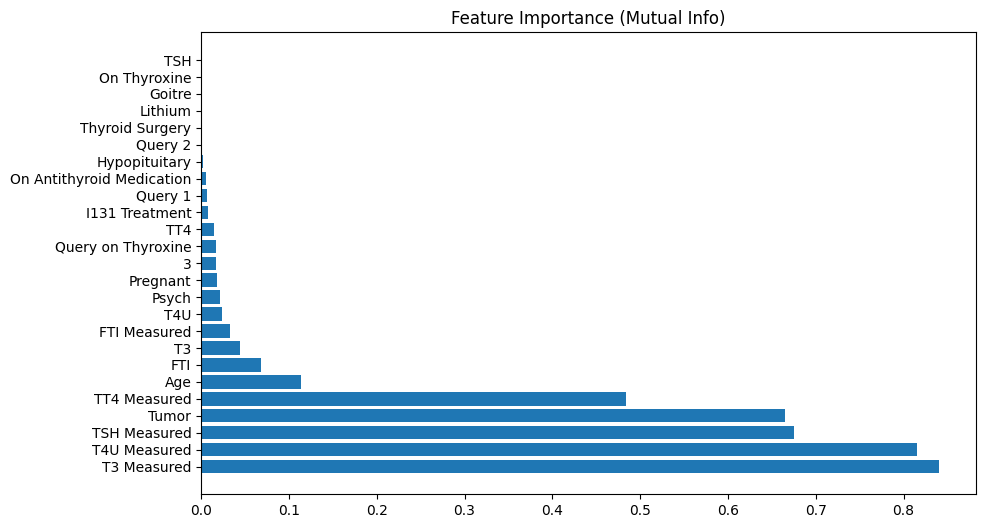

In [6]:
mutual_info = mutual_info_classif(X_train, y_train)
feature_scores = pd.DataFrame({
    'Feature': X_train.columns,
    'Mutual Info': mutual_info
}).sort_values(by='Mutual Info', ascending=False)

selected_features = feature_scores['Feature'].head(10).tolist()
print("\nSelected Features:", selected_features)

plt.figure(figsize=(10,6))
plt.barh(feature_scores['Feature'], feature_scores['Mutual Info'])
plt.title("Feature Importance (Mutual Info)")
plt.show()

In [7]:
X_train_clean = X_train[selected_features].copy()

for f in selected_features:
    Q1 = X_train_clean[f].quantile(0.25)
    Q3 = X_train_clean[f].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    mask = (X_train_clean[f] >= lower) & (X_train_clean[f] <= upper)
    X_train_clean = X_train_clean[mask]

y_train_clean = y_train.loc[X_train_clean.index]

print("\nTraining Data After Outlier Cleaning:", X_train_clean.shape)


Training Data After Outlier Cleaning: (4167, 10)


In [8]:
dt_model = DecisionTreeClassifier(
    criterion="gini",
    max_depth=None,
    random_state=42
)

dt_model.fit(X_train_clean, y_train_clean)

DecisionTreeClassifier(random_state=42)

In [9]:
y_pred = dt_model.predict(X_test[selected_features])

In [10]:
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=1))


Accuracy: 0.7662278710848842

Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.85      0.68       551
           1       0.93      0.58      0.71       557
           2       0.89      0.79      0.84       544
           3       0.84      0.85      0.84       551

    accuracy                           0.77      2203
   macro avg       0.81      0.77      0.77      2203
weighted avg       0.81      0.77      0.77      2203



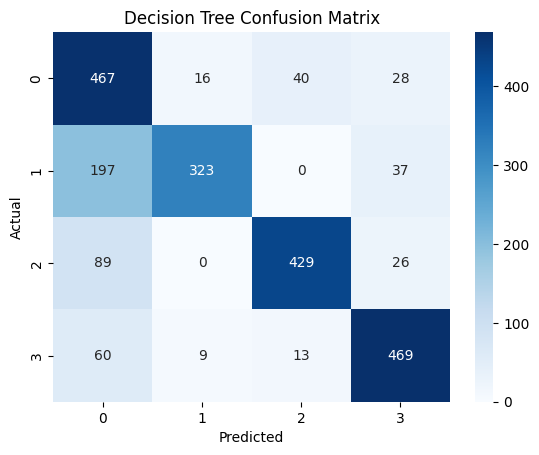

In [11]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

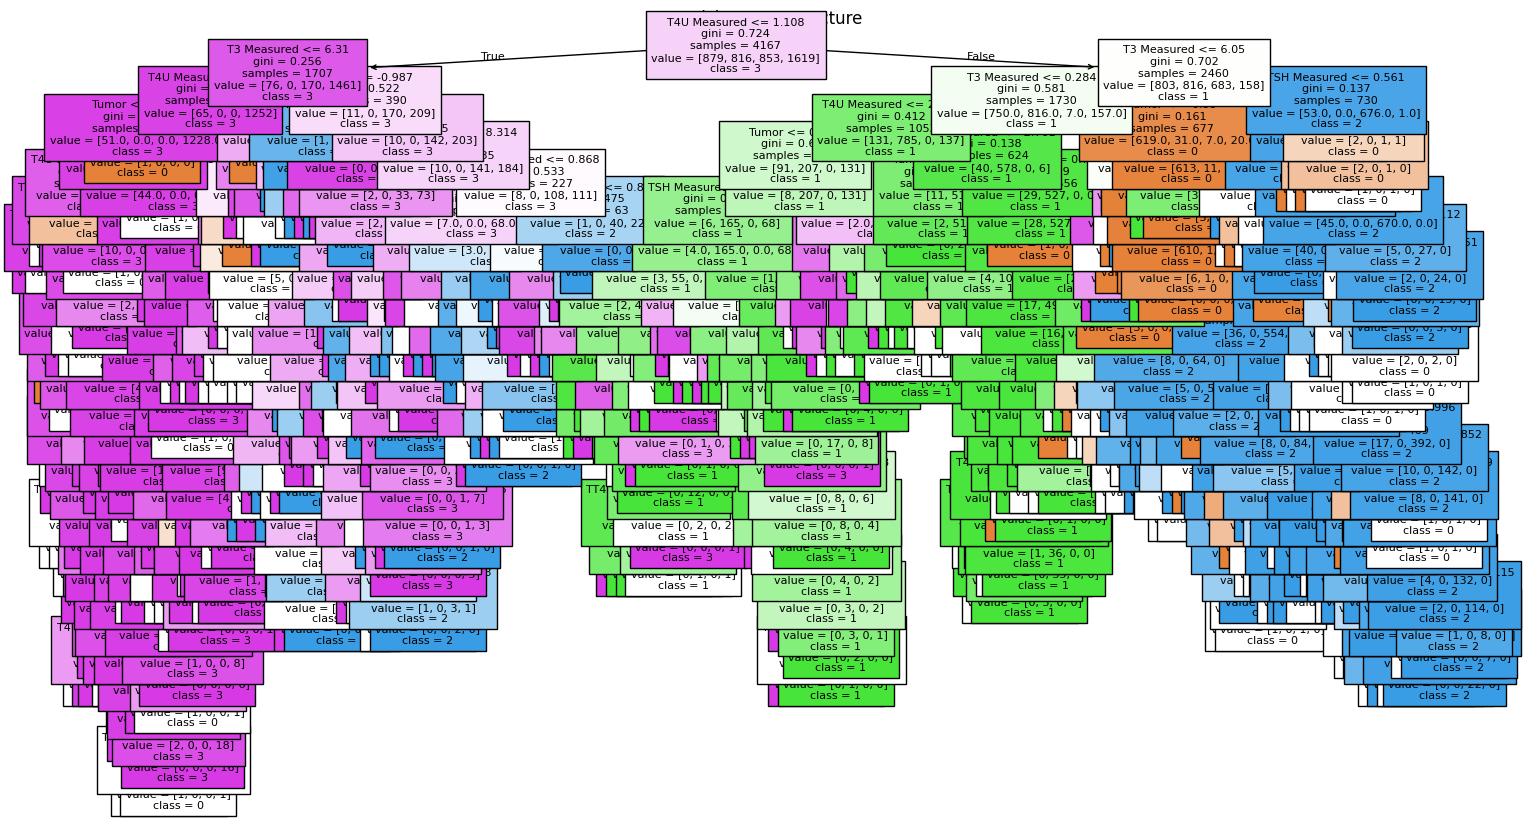

In [12]:
plt.figure(figsize=(18, 10))
plot_tree(dt_model,
          feature_names=selected_features,
          class_names=['0','1','2','3'],
          filled=True,
          fontsize=8)
plt.title("Decision Tree Structure")
plt.show()